<a href="https://colab.research.google.com/github/alexkardan/Data110/blob/main/Week5_HW_actual_version_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# View the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Based on the data those that survived get a 1 and those that didnt get a 0. The age ranges from around 20-40 looking at an average of around 30. It seems that most were either first or third class passengers on the Titanic with the first class passengers having a higher survival rate. It seems around 50/50 with men and women it seemed that the trips were with family. 891 would survive the titanic. The information contained in the dataset is classifying each person by class, how much there fare was, were they alone or with someone else. It was more descriptions of the people who were on board the titanic.

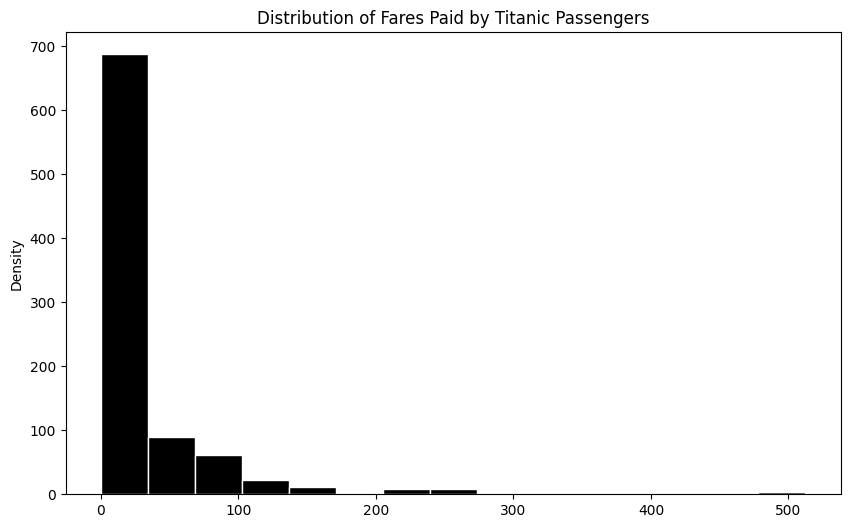

In [3]:
plt.figure(figsize = (10,6))
plt.hist(titanic['fare'], bins = 15, color = 'black', edgecolor = 'white')

plt.xlabel = ('Fare paid')
plt.ylabel('Density')
plt.title('Distribution of Fares Paid by Titanic Passengers')

plt.show()

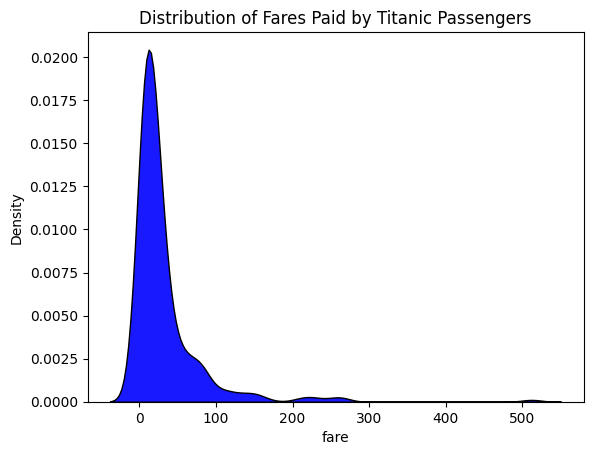

In [4]:
sns.kdeplot(titanic['fare'], bw_adjust = 1, color = 'blue', edgecolor = 'black', fill = True, alpha = 0.9)

plt.ylabel('Density')
plt.title('Distribution of Fares Paid by Titanic Passengers')

plt.show()

The data is mostly skewed to the right and there seems to be a few outliers at around the 500 mark which could be for the high income earners. Fare rate might impact survival rates as those who have a first class ticket may have been evacuated on better boats or there could of been a higher quantity of boats available so easier ot evacuate.

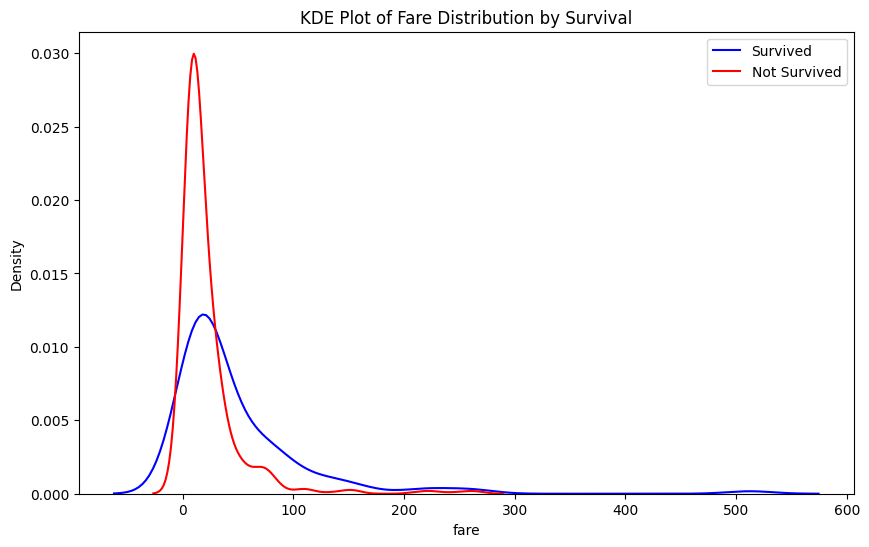

In [5]:
plt.figure(figsize = (10,6))
survived = sns.kdeplot(titanic[titanic['survived'] == 1]['fare'], color='blue', label='Survived', fill=False)
Dead = sns.kdeplot(titanic[titanic['survived'] == 0]['fare'], color='red', label='Not Survived', fill=False)


plt.ylabel('Density')
plt.title('KDE Plot of Fare Distribution by Survival')

plt.legend()
plt.show()

Fare does seem to have influenced survival as thos ehtat paid the most for fare tickets has such a low chance of dying. The distribution suggests that the socioeconomic status heavily impacted survival rate as we can see that those that paid very little for a fare ticket it shows a huge spike in the death probability.

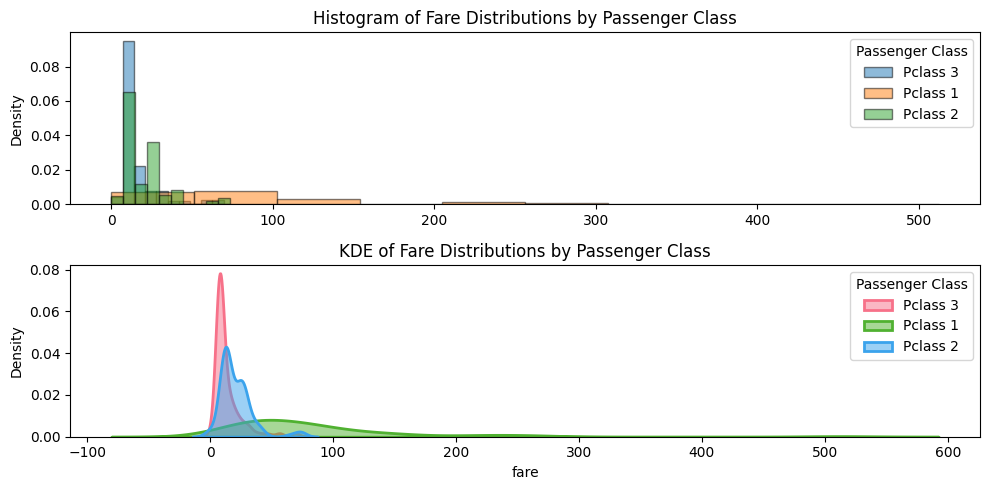

Survival Rates by Passenger Class:
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [6]:
plt.figure(figsize=(10, 5))

# Create a color palette for different passenger classes
palette = sns.color_palette("husl", len(titanic['pclass'].unique()))

# Loop through each unique passenger class and plot
for i, pclass in enumerate(titanic['pclass'].unique()):
    plt.subplot(2, 1, 1)  # First subplot for histogram
    # Create a subset for each passenger class
    subset = titanic[titanic['pclass'] == pclass]
    # Create a histogram for the fare of that class
    plt.hist(subset['fare'], bins=10, alpha=0.5, edgecolor='black', density=True, label=f'Pclass {pclass}')

    plt.subplot(2, 1, 2)  # Second subplot for KDE
    # Create a KDE plot for the fare of that class
    sns.kdeplot(subset['fare'], fill=True, alpha=0.5, color=palette[i], label=f'Pclass {pclass}', linewidth=2)

# Set titles and labels
plt.subplot(2, 1, 1)
plt.title('Histogram of Fare Distributions by Passenger Class')
plt.ylabel('Density')
plt.legend(title='Passenger Class')

plt.subplot(2, 1, 2)
plt.title('KDE of Fare Distributions by Passenger Class')
plt.ylabel('Density')
plt.legend(title='Passenger Class')

# Show the plots
plt.tight_layout()
plt.show()

# Analyzing survival rates for each class
survival_rates = titanic.groupby('pclass')['survived'].mean()
print("Survival Rates by Passenger Class:")
print(survival_rates)

For the first class it shows many passengers paying high fares it shows how wealthy passengers paid a lot for their tickets. For the second class fares are lower compared to the third class but significantly higher compared to the third class it also shows that its likely a lot of affluent middle-class passengers. For the third class it is the lowest in terms of far prices with less of a range. The survival rates are lower for those that paid higher fare rates. as th first class passengers have higher survival rates as they more then likely have more access to resources and social status making it more likely for them to be rescued. The second class probably has similiar advantages to the third class but just a little bit less resources. The third class passengers are likely located the farthest from life boat and necessary resources to survive the titanic crash.

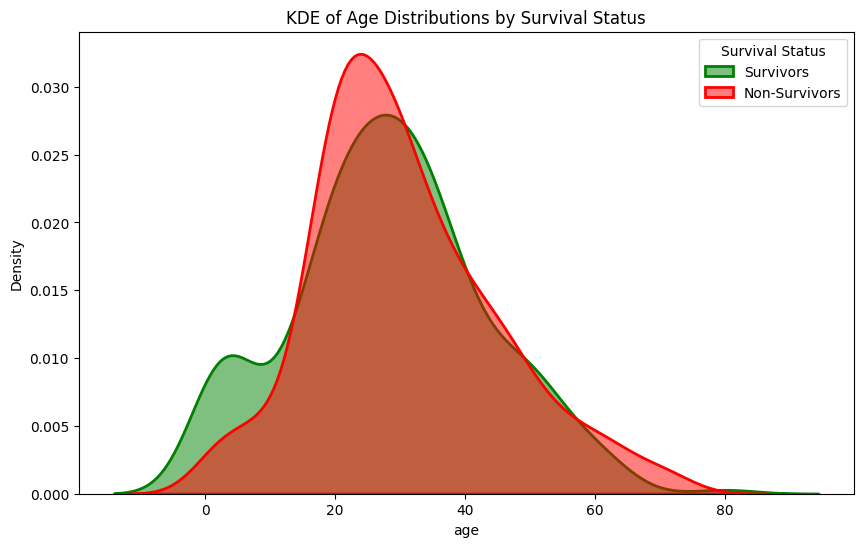

In [7]:
plt.figure(figsize=(10, 6))

# Create KDE plots for age distributions
sns.kdeplot(titanic[titanic['survived'] == 1], x='age', fill=True, alpha=0.5, color='green', label='Survivors', linewidth=2)
sns.kdeplot(titanic[titanic['survived'] == 0], x='age', fill=True, alpha=0.5, color='red', label='Non-Survivors', linewidth=2)

# Set titles and labels
plt.title('KDE of Age Distributions by Survival Status')
plt.ylabel('Density')
plt.legend(title='Survival Status')

# Show the plot
plt.show()

The main trends I notice based on the age distribution on survivors is that most are around the age 20-40 range with the graphs being very similiar for survivors and non-survivors. Age might have affected survival rates as those that seemed to be before 20 or early 20s had the lowest survival rates so younger age groups may have been more impacted by the titanic crash compared to those on the older side.

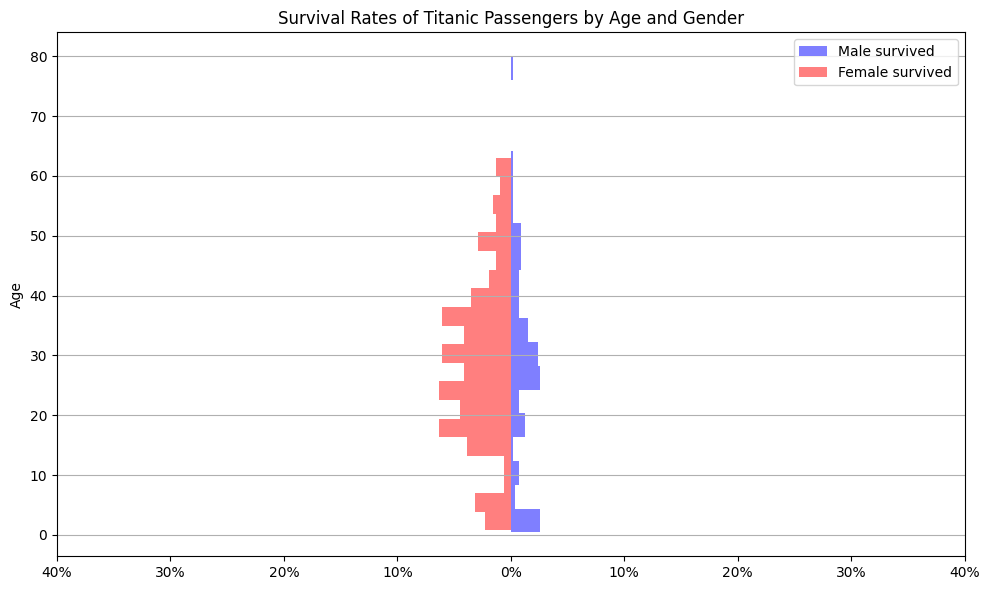

In [12]:
Male = titanic[titanic['sex'] == 'male']['age']
Female = titanic[titanic['sex'] == 'female']['age']

# Filter for survivors only (Male and Female)
Male_survived = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)]['age']
Female_survived = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]['age']

# Calculate the total male and female passengers
total_male = len(Male)
total_female = len(Female)

# Create a figure
plt.figure(figsize=(10,6))

# Plot normalized histograms for survival rates
# Male on the right
plt.hist(Male_survived, bins=20, label='Male survived', alpha=0.5, color='blue',
         orientation='horizontal', weights=[1/total_male] * len(Male_survived))


# Female on the left (multiply weights by -1)
plt.hist(Female_survived, bins=20, label='Female survived', alpha=0.5, color='red',
         orientation='horizontal', weights=[-1/total_female] * len(Female_survived))


# Label and customize plot
plt.ylabel('Age')
plt.title('Survival Rates of Titanic Passengers by Age and Gender')

# Adjust xticks to show percentages
plt.grid(axis='y')
plt.xticks([-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4], ['40%','30%','20%','10%','0%','10%','20%','30%','40%'])

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()






Women had a higher survival rate compared to men which makes sense as women and children were normally prioritized and evacuated to life boats first. There was a higher survival rate especially for women between the ages of 20-40. This could mean that younger women were priotized to safety on rescue boats.